# The Microsoft Cloud Stack for Research

rob5@uw.edu is Rob Fatland, UW Cloud Director


### Takeaway summarized

* Premise: Researchers Do Not Care About The Cloud
* Cloud is the new PC
* Ground up support: your browser
* UW is cloud agnostic; the real issue is { how? when? }
* The Wild West is littered with power tools...


### More takeaways

* My belief is that the cloud is more familiar than strange
* Disclosure: pip install azure, netcdf4, metpy
* This talk touches upon: Microsoft, Azure, Python, Open-source, Visual Studio, Azure ML, Help!!!
* Rob's Law
* Repro
* Figure out how ( figure out how ( figure out how ( ... (do something) ...)))
* The real question may be: Where to bet your time learning a new technology?

### Call To Action!

* Join { Cloud iTeam }, help me build the Fog Bank


# Begin()

My premise: Researchers do not care about the cloud as an end in itself. 

ToDo[] > timeAvailable

This is not a Zero Sum Game.

* You win by writing papers which proceed from new insights which proceed from your research process
* Or you win by enabling others to have success in their research
* I win by saving you time
* The best way to save you time is to connect you to what you already know how to do. 
* Let's look for things you may already be keen on in the context of the MCS.
    * Python SDK for Azure Services
    * Visual Studio Python toolkit for Azure
    * Azure Machine Learning Studio and Python
    * Python SDK for Azure Machine Learning
    * Jupyter in Azure Machine Learning
    * Anaconda distributions (kilroy; see Shah's email) for Windows and Linux


### What's the value claim for the Microsoft stack?

* Microsoft is building out Azure and incorporating Python like mad
* Visual Studio helps you write code and plays well with github
* Microsoft should by synonymous with Open Source


### My work
* Lightweight Data Systems (LWDS) workshop, Seattle, UW
* Research > Public Use
    * LiveOcean
    * Ice2Ocean
    * AralDIF    
* BDS spans from microbial ecology to marine geochemistry
* Visualization: Narwhal


In [1]:
# Some necessary business out of the way...
rooturl = 'http://robfatland.net/cloudday/'

from PIL import Image
import urllib, cStringIO
from matplotlib.pyplot import imshow

%pylab inline

def smim(url, desiredWidth, figdim):
    plt.figure(figsize=(figdim,figdim))
    imageFile = cStringIO.StringIO(urllib.urlopen(url).read())
    image = Image.open(cStringIO.StringIO(urllib.urlopen(url).read()))
    (w, h) = image.size
    imageResized = image.resize((desiredWidth, int(float(desiredWidth)*(float(h)/float(w)))), Image.NEAREST)
    imshow(np.asarray(imageResized))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().set_frame_on(False)

Populating the interactive namespace from numpy and matplotlib


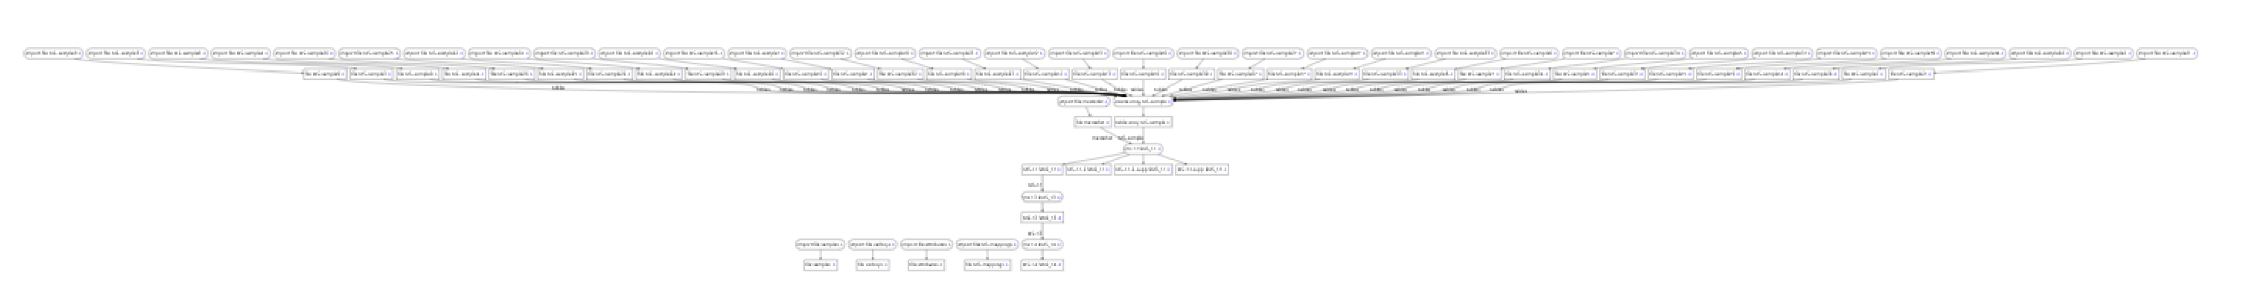

In [2]:
smim(rooturl + 'BDS_Provenance_All.png', 3000, 40)

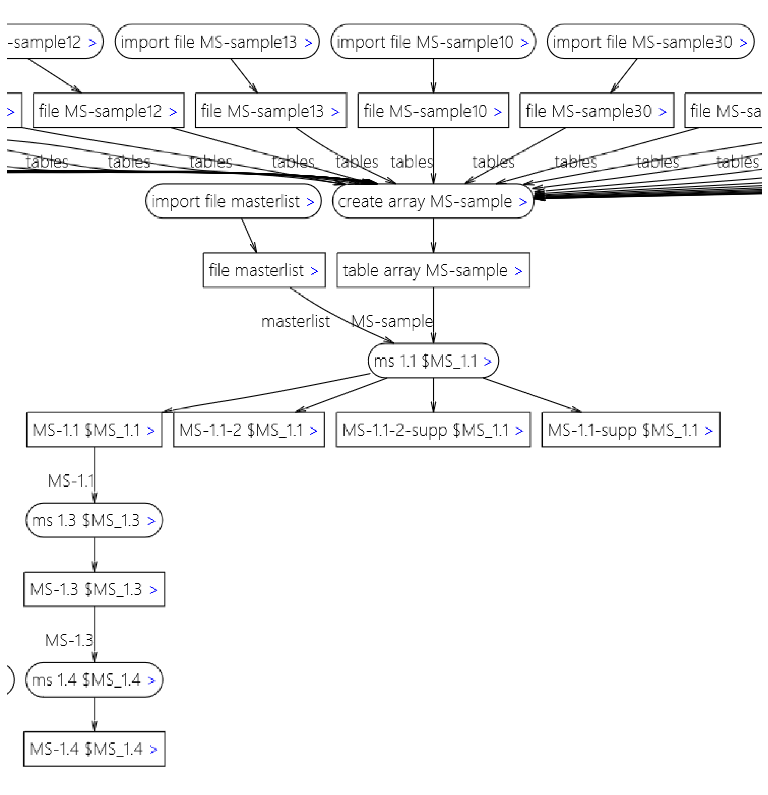

In [3]:
smim(rooturl + 'BDS_Provenance_Detail.png', 2500, 14)

Again thematically we'd like to invent wheels once. Provenance in executable papers is one of the wheels in the above system. To enumerate them a bit further they align with LWDS as follows: 

* Data is private until you hit 'Publish'
* You are contributing spectral geochemistry data from one of a small number of analysis methodologies
* You are receiving value: Processing is done for you...
* ...in fact it is MATLAB running in the cloud for free
* You can download particular Level results
* You can download the entire Provenance tree
* You can query your own data enclave across many Datasets
* You can query the Public Library
* You can (we intend) send your results to other Libraries
* Other Libraries can dial in and make queries 

These are some of wheels.  Models, data production / distribution systems, analytics, query... It's a deep subject but I would like to speak next to the Consumer. We touch on that in the last bullet above; so now I need to dredge up Rob's Law. 



### Meta


* "...and she got the right answer."
* The point being that she got there on the power of tools built for her
* Around this time (2004): Arrives Naomi Oreskes -- science historian
* Publishes 'Beyond The Ivory Tower', a study of peer review abstracts in relation to AGCC
* Condition: abstract must mention global climate change. 
* Conclusion: Consensus in the community: 75% / 25% / 0%, { support / no relevance / contradict } AGCC thesis
* Many implications but the one we are interested in is OSTP
* Oreskes paper has a direct line of descent to the CDI and 'resiliency'
* The political questions concern: Stability of the thesis and succesful brokerage
* And who is the information consumer? ...and so on to apiculture...

In [6]:
from IPython.display import Image
i = Image(url = rooturl + 'region of interest with validation moorings indicated.png')
i



### With that: Enter LiveOcean


### List Of Problems To Address

1. I know the URL of an image... I would like to display it in my iPython notebook at a pleasant scale.
2. I use Visual Studio to Publish a Project on Azure but I get an error message about python virtual environments... 
3. I heard about a website with an API that provides data I need; how do I talk to that API? 
4. I got an ARGO data file (NetCDF) and I want to disassemble it, plot it, and compare it against a forecast result. 

### Problem 1 Resize an image

This is 'obvious'! 

* Enter 'python resize image' in a browser search window like bing ;) 
* See what comes up. Oh look here: there is something called the Python Image Library (PIL).

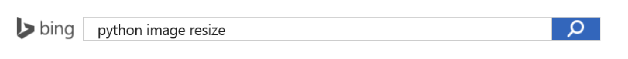

In [8]:
# Clobber the namespace from the above 'IPython.display' Image import
from PIL import Image
smim(rooturl + 'bing search python image resize.png', 1400, 11)

Search on Python Image Library and I get an install page. 

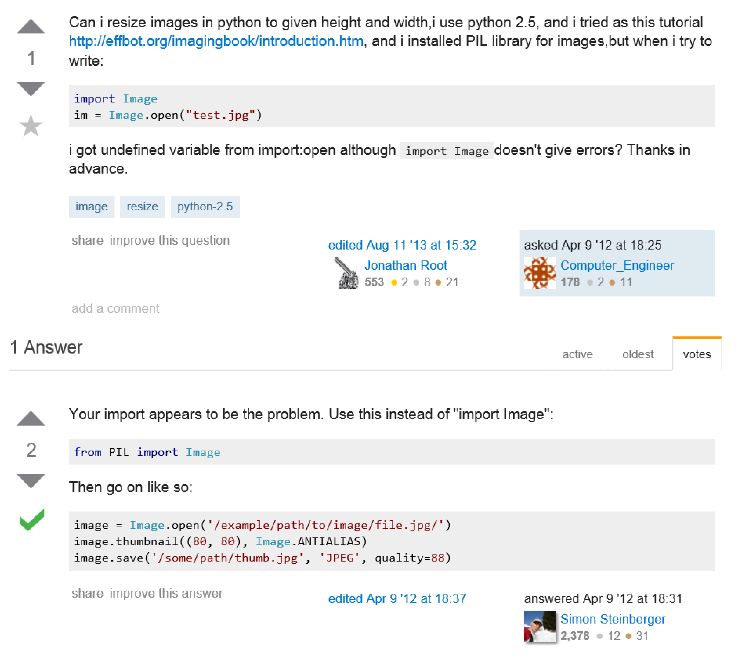

In [10]:
smim(rooturl + 'stack overflow image resize answer.png', 2800, 13)

##### Meta
    
* How do I know that PIL is the best practice solution?
* Once I install it does python "just know" it is there; or do I need to reboot something?
* Now that I have it installed: How to use it?
* If I have a bit of code that is useful: Can I 'def' it into a function with imports indented???
* Help shows gca() and gcf()... so what are these and how do I learn everything they do?

Populating the interactive namespace from numpy and matplotlib


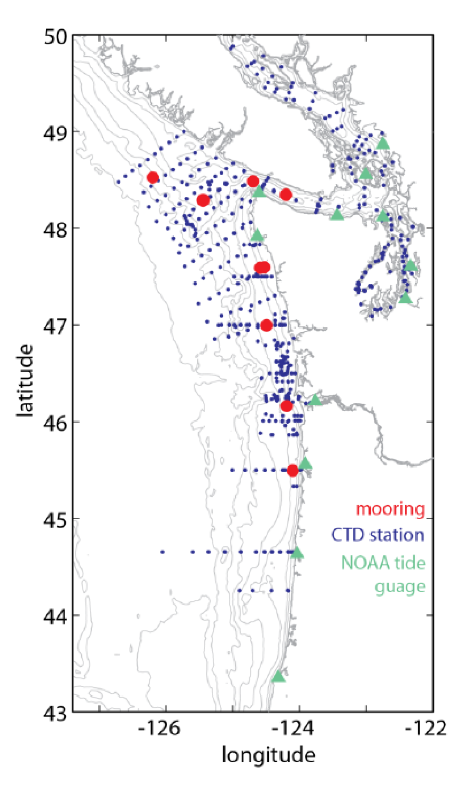

In [11]:
# So I start blundering along and arrive at this: 

from PIL import Image
import urllib, cStringIO
from matplotlib.pyplot import imshow

%pylab inline

url = rooturl + 'region of interest with validation moorings indicated.png'
desiredWidth=800

plt.figure(figsize=(14,14))
imageFile = cStringIO.StringIO(urllib.urlopen(url).read())
image = Image.open(imageFile)
(imageWidth, imageHeight) = image.size
derivedHeight = int(float(desiredWidth)*(float(imageHeight)/float(imageWidth)))
imageResized = image.resize((desiredWidth, derivedHeight), Image.NEAREST)
imshow(np.asarray(imageResized))
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(False)



#### However...

To go against 'cooking show': Here is a cleaned up version of some of my proces

Populating the interactive namespace from numpy and matplotlib


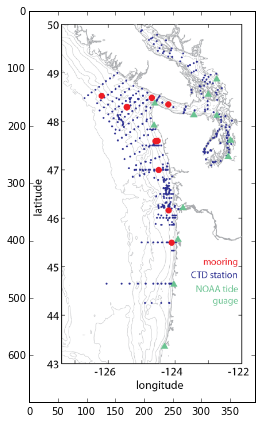

In [13]:
# These three lines get me an 'Image' utility that reproduces images verbatim in this notebook; a good start
# 
# from IPython.display import Image
# i = Image(url='http://liveocean.azurewebsites.net/api/get-overlay?date=2015-05-21T22:00:00Z&depthIndex=39&param=salt')
# i
# 
# However it is not clear how to resize them... so I went off on a bit of a wild goose chase. 
#

from PIL import Image

# get to inline mode...
%pylab inline

# From a local file it is simple to read in an image...
# roiImage = Image.open('LocalImageFile.png', 'r')
# But I want this ipython notebook to be re-locatable. First I placed the images at a URL.
#   Now to load those images... not obvious... so I search 'PIL open image from url' -->
#   http://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

import urllib, cStringIO

imageUrl = rooturl + 'region of interest with validation moorings indicated.png'
imageFile = cStringIO.StringIO(urllib.urlopen(imageUrl).read())

# In the end-result figure we have a dimension set here:
plt.figure(figsize=(7,7))


roiImage = Image.open(imageFile)

# roiImage.show() just gets me '<matplotlib.figure.Figure at 0xeb4b080>'

# How about this: 

imshow(roiImage)

roiImage.size <type 'tuple'>


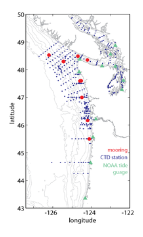

In [14]:
# Above shows my figure with a black border and axes! May be useful some day...


# This next part is obvious except for the implicit use of a two-element vector (w, l)
# Kilroy let's find out what this really should be called.
# It is not a List!
# It is not a Dictionary!
# Is it a numpy array??? Naw...

(width, height) = roiImage.size
print 'roiImage.size', type(roiImage.size)

desiredWidth = 200
derivedHeight = int(float(desiredWidth)*(float(height)/float(width)))
roiSmall = roiImage.resize((desiredWidth, derivedHeight), Image.ANTIALIAS)

# Now how to display this inline??
# logo_small.show() does not work
# logo_small does not work
# logo_small.save('logo_small.png') saves the image as a file; but that does not help

# Back to the search engine, this time 'ipython notebook display PIL image'
# http://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook
# Kilroy screencap would be useful here

from matplotlib.pyplot import imshow
imshow(np.asarray(roiSmall))

# Ok that worked but now I have some coordinate axes on my nice figure that I don't want;
# plus a border. So you guessed it...
# Oh but now this shows my image with coordinate axes around it.

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_frame_on(False)

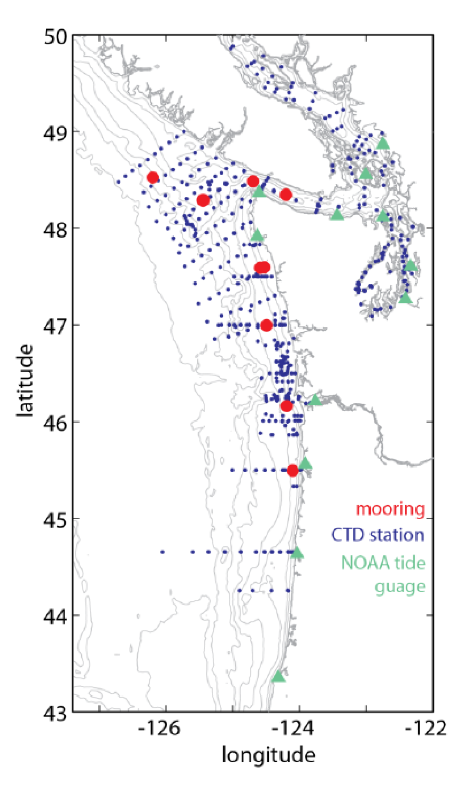

In [16]:
# Oho! (width, height) was a tuple!

# Before going on let's try out the resolution / size parameters

smim(rooturl + 'region of interest with validation moorings indicated.png',800, 14)

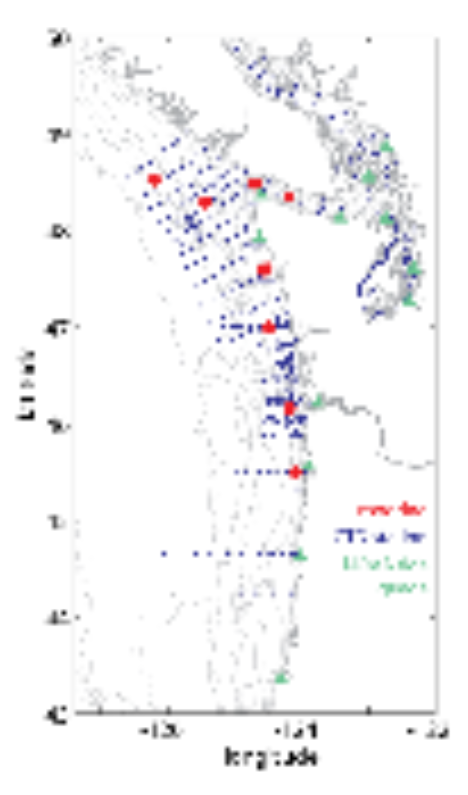

In [17]:
smim(rooturl + 'region of interest with validation moorings indicated.png',100, 14)

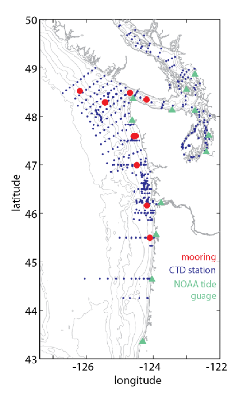

In [18]:
smim(rooturl + 'region of interest with validation moorings indicated.png',800, 7)

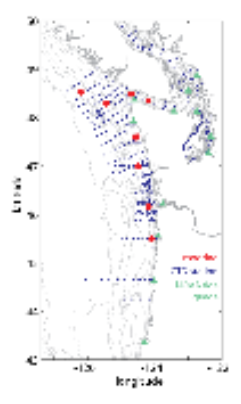

In [19]:
smim(rooturl + 'region of interest with validation moorings indicated.png',100, 7)

### Intermezzo: Live Ocean

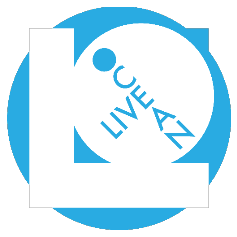

In [20]:
smim(rooturl + 'LiveOcean Logo.png', 500, 4)

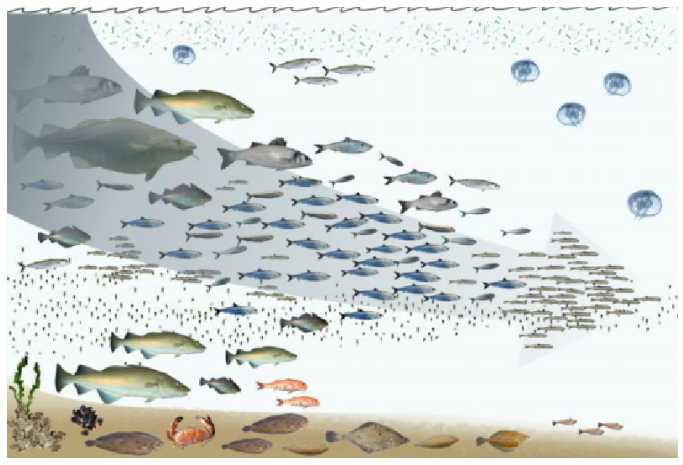

In [21]:
smim(rooturl + 'marine trophic level diagram placeholder.png', 800, 12)

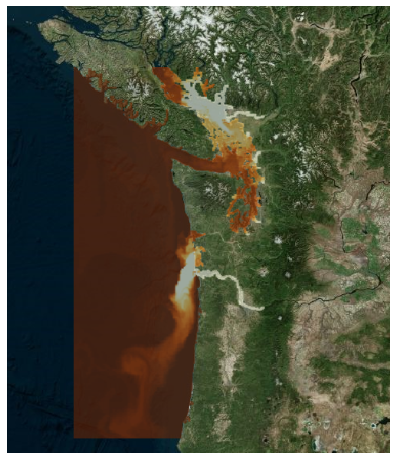

In [22]:
smim(rooturl + 'region of interest bing maps overlay surface salinity orange colormap.png', 500, 8)

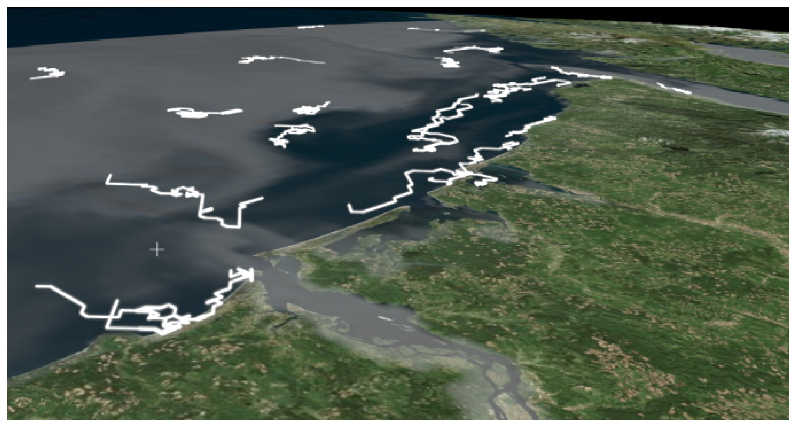

In [23]:
smim(rooturl + 'LiveOcean zooplankton whale simple example.png', 1600, 14)

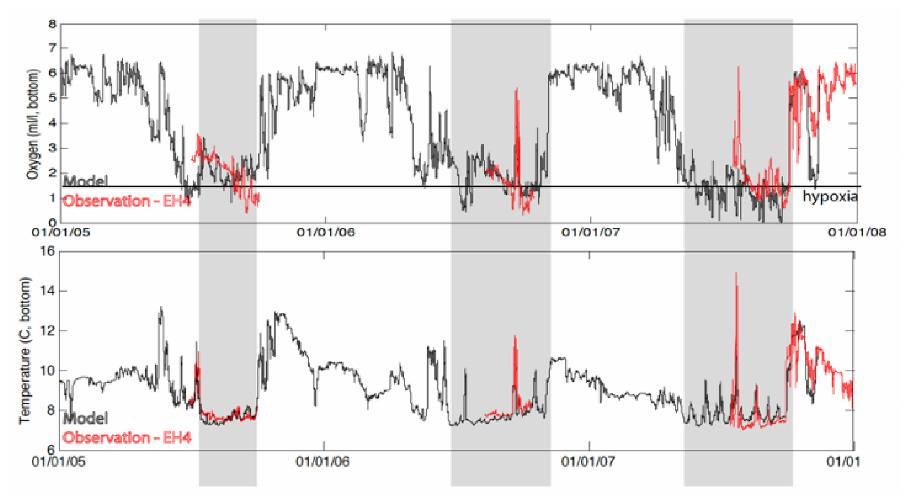

In [24]:
smim(rooturl + 'ROMS model validation from Siedlecki.png', 2000, 16)

### Problem 2 Publishing Error on Virtual Environments in Visual Studio

##### The Microsoft Development Environment


* Visual Studio is free
* It supports python among several other languages
* It has a very rich set of capabilities, first and foremost for me being hover



##### The error message

A virtual environment is required to deploy dependencies to Microsoft Azure Web Sites. Either add a virtual environment or add <SuppressWebSitesVirtualEnvError>true</SuppressWebSitesVirtualEnvError> to your project if you have no dependencies other than the Python standard library.

##### The solution

* I mention this error because I need to modify Live Ocean middleware and republish it; and it can be very magical to have something break for no apparent reason with no apparent solution.
* Again searches are a good bet; but in this case it was right-clicking and menu inspection in Visual Studio.
* My virtual python environment was not Active; but there is a control panel to activate it; and then all's good.


### Problem 3 Learn about and write a Utility program w/r/t an API

In [25]:
import json
import urlparse
import requests
import numpy

%pylab inline

# Establish the api base URL
baseUrl = "http://liveocean.azurewebsites.net/api/"

Populating the interactive namespace from numpy and matplotlib


In [27]:
# We move on now to the get-value api call: JSON format, contents are data (in this case salinity at 10 meters depth)
requestcall = "get-value"

# data_args = {'date':'2015-05-28T22:00:00Z', 'depthMeters':'-10.0','param':'salt'}
data_args = {'date':'2015-06-02T06:00:00Z', 'depthMeters':'-10.0','param':'salt'}
apiReply = requests.get(urlparse.urljoin(baseUrl, requestcall), params=data_args)

print 'Call =', apiReply.url 
print 'Reply status is', apiReply.ok
print 'Status code is', apiReply.status_code, '\n'

# convert response to json
jsonReply = apiReply.json()
print 'jsonized get-value reply is of', type(jsonReply), '; length', len(jsonReply)

# pull out the dictionary entries, 'min', 'max' and 'data'
minValue = jsonReply['min']
maxValue = jsonReply['max']
print 'minValue is of', type(minValue), 'with value', minValue
print 'maxValue is of', type(maxValue), 'with value', maxValue
print ""
print ""
data=jsonReply['data']
print 'The data entry of this dictionary is of', type(data)

# Determine the dimensions of the data List-of-Lists
numLists = len(data)
numElementsPerList = len(data[0])
print 'API getvalue provides', numLists, 'lists each with', numElementsPerList, 'elements','\n'

# Print a couple of exemplars, one from the water and one from the masked-out land
print 'element 341 of list 131, data[130][340], is',data[130][340],'which is ',type(data[130][340]),'\n'
print 'element 381 of list 174, data[173][380], is',data[173][380],'which is ',type(data[173][380]),'\n'

# Count the number of float values and 'Nones' to ensure they sum to the total grid cell count
nFloat = 0
nNone = 0
for s in data:
    for t in s:
        if (isinstance(t,float)):
            nFloat += 1
        else:
            nNone += 1
        
print 'floats:',nFloat,'and Nones:',nNone, 'sum is',nFloat+nNone,'and area is',numLists*numElementsPerList
print ""

if nFloat + nNone != numLists*numElementsPerList:
    print ""
    print "data check finds a discrepancy between expected types and grid area."
    print ""
    print "Kilroy: SERIOUS PROBLEM, data field is not self-consistent"
    print ""
    print ""
else:
    print ""
    print "data check shows data[][] is self-consistent"
    print ""

Call = http://liveocean.azurewebsites.net/api/get-value?date=2015-06-02T06%3A00%3A00Z&depthMeters=-10.0&param=salt
Reply status is False
Status code is 500 



ValueError: No JSON object could be decoded

In [28]:
# We move on now to the get-value api call: JSON format, contents are data (in this case salinity at 10 meters depth)
lonIndex = 10
latIndex = 10
myD = []
myS = []
signal = []

for x in arange(0.0, 2001.0, 40.0):
    thisDepth = str(-x)
    # print thisDepth
    requestcall = "get-value"
    # data_args = {'date':'2015-06-02T06:00:00Z', 'depthMeters':'0.0','param':'salt'}
    data_args = {'date':'2015-06-02T06:00:00Z', 'depthMeters':thisDepth,'param':'salt'}
    # print data_args
    apiReply = requests.get(urlparse.urljoin(baseUrl, requestcall), params=data_args)
    jsonReply = apiReply.json()
    data=jsonReply['data']
    myD.append(x)
    myS.append(data[10][10])
    patch = []
    for j in range(3,30):
        for k in range (3,30):
            patch.append(data[j][k])
    print 'depth:', x, 'api reply:', apiReply.status_code, ', salinity patch stddev:', std(patch)
    signal.append(std(patch))
    
plot(myD, myS)

ValueError: No JSON object could be decoded

### Problem 4 Understand a NetCDF file from an ARGO buoy

#### Jargon


repl


'Read-Eval-Print Loop' is the command line; and it applies to python generally and iPython Notebooks. 



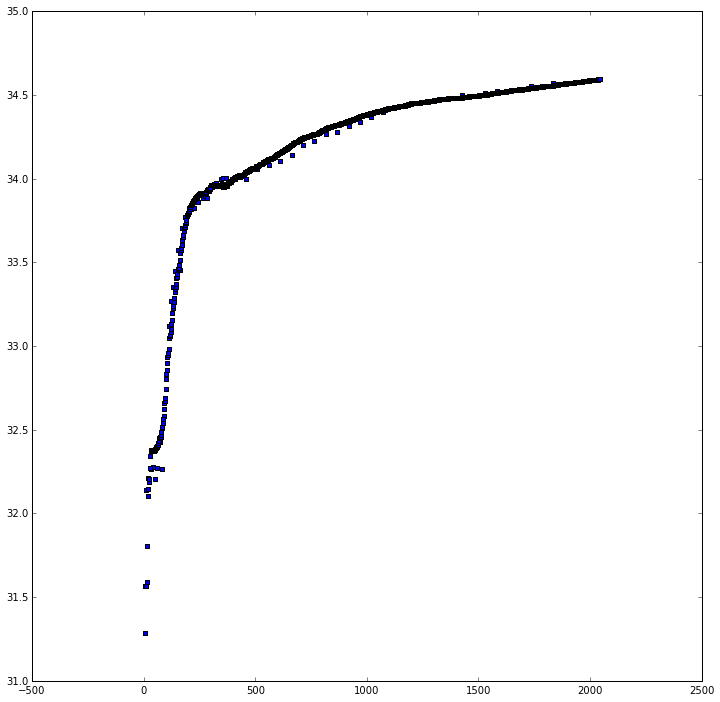

In [32]:
# The amount of effort to recover this ARGO file is beyond the scope of this talk

import matplotlib
import netCDF4
from netCDF4 import *

# How we might explore the netCDF4 Library:
# print dir(netCDF4)
# We particularly might eventually care about Dataset and num2date

# Not intended to be an operational conversion constant!
decibarsToMeters = 1019.977/1000.0

f = Dataset("../data/R5903601_130.nc",'r', Format='NETCDF4')
g = Dataset("../data/argo-profiles-4901664.nc",'r',Format='NETCDF4')

# From the following two lines I culled out some interesting variables...
# 
# for v in f.variables:
#     print [v]
# 
# Notice they are encoded with the unicode lead-character 'u':
# 
# [u'REFERENCE_DATE_TIME']
# [u'DATE_CREATION']
# [u'DATE_UPDATE']
# [u'PLATFORM_NUMBER']
# [u'PROJECT_NAME']
# [u'PI_NAME']
# [u'STATION_PARAMETERS']
# [u'CYCLE_NUMBER']
# [u'DIRECTION']
# [u'DATA_MODE']
# [u'PLATFORM_TYPE']
# [u'JULD']
# [u'LATITUDE']
# [u'LONGITUDE']
# [u'POSITIONING_SYSTEM']
# [u'VERTICAL_SAMPLING_SCHEME']
# [u'PROFILE_PRES_QC']
# [u'PRES']
# [u'PRES_ADJUSTED']
# [u'TEMP']
# [u'TEMP_ADJUSTED']
# [u'PSAL']
# [u'PSAL_ADJUSTED']
# [u'SCIENTIFIC_CALIB_COMMENT']
# 
# So more on these below; let's first get to the main points for salinity and depth

# Pressure will be a proxy for depth. Salinity increases with depth. Temp decreases with depth.
psalLabel=u'PSAL'
presLabel=u'PRES'
tempLabel=u'TEMP'

# Provide both the units of measure and the array dimensions for the data
# print "Here is the first file Kilroy found:"
# print ""
# print f.variables[psalLabel].units
# print f.variables[psalLabel].shape
# print f.variables[presLabel].units
# print f.variables[presLabel].shape
# print f.variables[tempLabel].units
# print f.variables[tempLabel].shape
# print ""
# print ""
# print "Here is the second file Kilroy found:"
# print ""
# print g.variables[psalLabel].units
# print g.variables[psalLabel].shape
# print g.variables[presLabel].units
# print g.variables[presLabel].shape
# print g.variables[tempLabel].units
# print g.variables[tempLabel].shape
# print ""
#print ""


# From the 2-D data we pull 1-D arrays using the wildcard ':' character
#   This follows after just test-printing everything! [0] is the important stuff
salinity=f.variables[psalLabel][0,:]
pressureDecibars=f.variables[presLabel][0,:]
temperature=f.variables[tempLabel][0,:]

# Using an approximate conversion constant we go from pressure to depth
depthMeters = pressureDecibars*decibarsToMeters

# Here is the salinity versus depth plot
# plot(depthMeters,salinity)

# Let's hold off before we do the comparison:
# plot(myD, myS)


# From the 2-D data we pull 1-D arrays using the wildcard ':' character
#   This follows after just test-printing everything! [0] is the important stuff
salinity2 = g.variables[psalLabel][0,:]
pressureDecibars2 = g.variables[presLabel][0,:]
temperature2 = g.variables[tempLabel][0,:]

# Using an approximate conversion constant we go from pressure to depth
depthMeters = pressureDecibars*decibarsToMeters
depthMeters2 = pressureDecibars2*decibarsToMeters

# Here is the salinity versus depth plot
# plot(depthMeters,salinity)
# plot(depthMeters2,salinity2)
figdim = 12
figure(figsize=(figdim,figdim))
scatter(depthMeters, salinity, marker = ',')
scatter(depthMeters2, salinity2, marker = ',')

In [41]:
# This cell determines location and time of the data (irrespective of drift velocity << LiveOcean cell size)

import datetime

latLabel=u'LATITUDE'
lonLabel=u'LONGITUDE'

# Of the following 'DATE_CREATION' and 'DATE_UPDATE' were identical and useful
refDTLabel=u'REFERENCE_DATE_TIME'
dateCreationLabel=u'DATE_CREATION'
dateUpdateLabel=u'DATE_UPDATE'
juldLabel=u'JULD'

# print f.variables[latLabel].shape
# print f.variables[lonLabel].shape
# print f.variables[latLabel][:]
# print f.variables[lonLabel][:]

# print f.variables[refDTLabel][:]
# print f.variables[dateCreationLabel][:]
# print f.variables[dateUpdateLabel][:]
# print f.variables[juldLabel][:]

# From the above (commented out) we determine:

argoLat = 44.152
argoLon = -126.483
argoDate = datetime.datetime(2015,6,2,5,31,34)

print 'The data are timestamped at approximately', argoDate

# Now what is needed...
# Data and Time for this data...
# Cell values (all 40) at that location from LO

# This cell prints out some other interesting information from the NetCDF file

print 'Platform number (expect 5903601):', f.variables[u'PLATFORM_NUMBER'][0,:]

print 'Project name:', f.variables[u'PROJECT_NAME'][0,:]
print 'PI name:', f.variables[u'PI_NAME'][0,:]
print 'Station parameters:', f.variables[u'STATION_PARAMETERS'][0,:]
print 'Cycle number (expect 130):', f.variables[u'CYCLE_NUMBER'][:]
print 'Direction:', f.variables[u'DIRECTION'][:]
print 'Data mode:', f.variables[u'DATA_MODE'][:]
print 'Platform type:', f.variables[u'PLATFORM_TYPE'][0,:]
print 'Positioning system:', f.variables[u'POSITIONING_SYSTEM'][0,:]

# and so on... 
# print 'Vertical sampling scheme:', f.variables[u'VERTICAL_SAMPLING_SCHEME'][:]
# print 'Scientific calibration comment:', f.variables[u'SCIENTIFIC_CALIB_COMMENT'][0,0,0,:]



# The CTD has "adjusted" versions of the data: Are they the same or different???
# These lines show that adjusted pressure is off by 30 cm and salinity and temperature are ok
pressureAdjusted = f.variables[u'PRES_ADJUSTED'][0,:]
# print pressureAdjusted - pressureDecibars
tempAdjusted = f.variables[u'TEMP_ADJUSTED'][0,:]
# print tempAdjusted - temperature
psalAdjusted = f.variables[u'PSAL_ADJUSTED'][0,:]
# print psalAdjusted - salinity

The data are timestamped at approximately 2015-06-02 05:31:34
Platform number (expect 5903601): ['5' '9' '0' '3' '6' '0' '1' --]
Project name: ['U' 'S' -- 'A' 'R' 'G' 'O' -- 'P' 'R' 'O' 'J' 'E' 'C' 'T' -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
PI name: ['S' 'T' 'E' 'P' 'H' 'E' 'N' -- 'R' 'I' 'S' 'E' 'R' -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
Station parameters: [['P' 'R' 'E' 'S' -- -- -- -- -- -- -- -- -- -- -- --]
 ['T' 'E' 'M' 'P' -- -- -- -- -- -- -- -- -- -- -- --]
 ['P' 'S' 'A' 'L' -- -- -- -- -- -- -- -- -- -- -- --]]
Cycle number (expect 130): [130 130]
Direction: ['A' 'A']
Data mode: ['A' 'A']
Platform type: ['A' 'P' 'E' 'X' -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- --]
Positioning system: ['A' 'R' 'G' 'O' 'S' -- -- -

### The Real Problem: Does ARGO Validate LiveOcean in this one example?¶

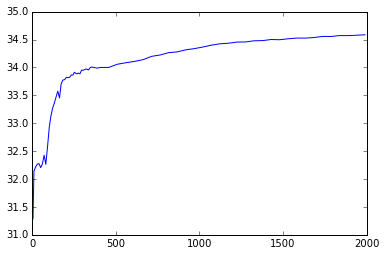

In [42]:
plot(depthMeters,salinity)
plot(myD, myS)

<Container object of 3 artists>

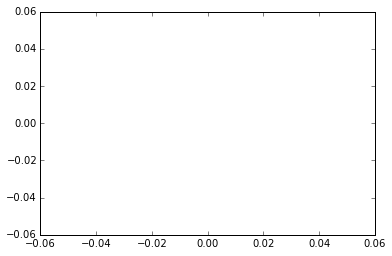

In [43]:
plt.errorbar(myD, myS, yerr=signal)

### Metpy from UCAR

In [44]:
import metpy

print metpy

<module 'metpy' from 'C:\Anaconda\lib\site-packages\metpy\__init__.pyc'>


# Microsoft Technology Stack

### Projects, Solutions

* Open source: Computational Network Toolkit
* Open source / operational: FetchClimate
* Open source: WRF on Azure
* Visual Studio: One click to Flask, Bottle, Django
* Open Source (pending): LiveOcean
* Open Source (pending): BDS Geochemistry online data Library
* Open Source: Worldwide Telescope + Narwhal (1e7 data points; time; geometry)


### Visual Studio

* Host your software in the Azure cloud; also git-friendly
* Easy to collaborate on (Big!) software projects: Add people
* Tools for managing software development: Backlog, task lists, charting...
* Plays well with languages (python) and development environments (eclipse)
* Free


* INTELLISENSE

In [45]:
# Kilroy: because storage and key are disabled, this code will not work
#   storage is a storage account on azure
#   key is an access key used to authenticate
storage = 'liveoceanblob'
key = 'Wuxkv+UwBPvasfV9jLozv6cO5inmNFLVRUPtkC1t2Hfra4DFj4FJ70+xDSZNek0W20zSNA1UFXpTpLLLB4l8Pw=='

# Some necessary business out of the way...
rooturl = 'http://robfatland.net/cloudday/'

from PIL import Image
import urllib, cStringIO
from matplotlib.pyplot import imshow

%pylab inline

def smim(url, desiredWidth, figdim):
    plt.figure(figsize=(figdim,figdim))
    imageFile = cStringIO.StringIO(urllib.urlopen(url).read())
    image = Image.open(cStringIO.StringIO(urllib.urlopen(url).read()))
    (w, h) = image.size
    imageResized = image.resize((desiredWidth, int(float(desiredWidth)*(float(h)/float(w)))), Image.NEAREST)
    imshow(np.asarray(imageResized))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().set_frame_on(False)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


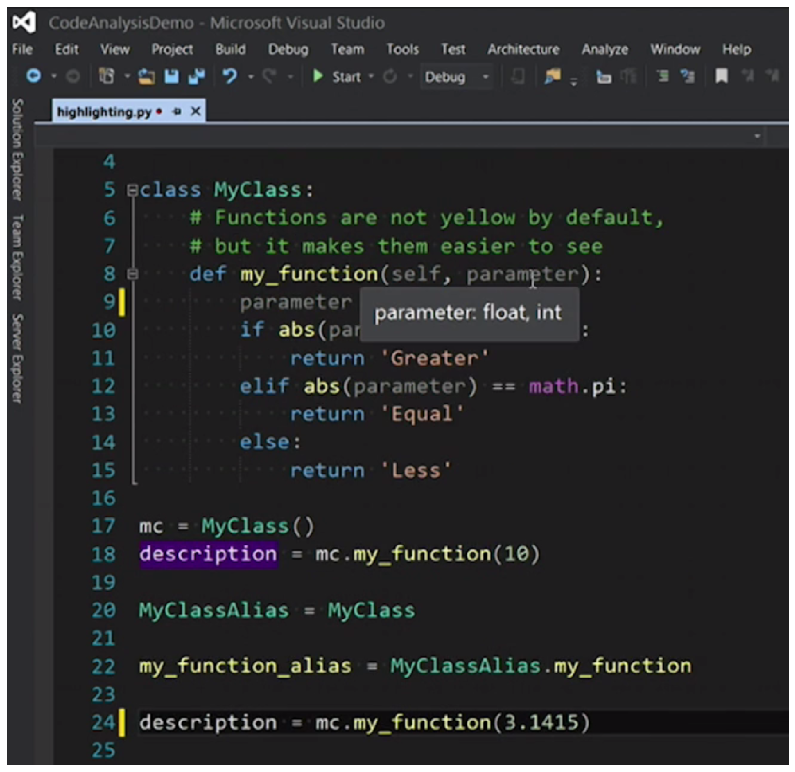

In [46]:
smim(rooturl + 'Visual Studio python code editor features.png', 2400, 14)

##### PTVS is one thing, Azure SDK is another


* Python Tools for Visual Studio is just that...
* The SDK is just a library that lets people access Azure services using Python, and doesn't have anything to do with PTVS, which is the visual studio support.


### Azure

* Storage accounts can hold files: 'blobs' because they are not directly addressable.
* LiveOcean has a logical structure built around its duty cycle
* Every 24 hours it creates 72 hours of forecast data
* These are represented in 72 NetCDF files transcribed to Azure blob storage

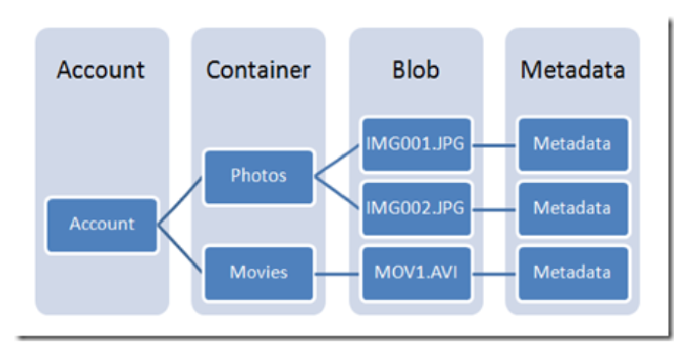

In [47]:
smim(rooturl + 'Blob Diagram.png', 1400, 12)

In [37]:
# upon 'pip install azure' this works: 

import azure
from azure.storage import BlobService

year = '2015'
month = '06'
day = '23'
container_name = 'f' + year + month + day

# print azure.__version__

# Done earlier:
#   storage = (some storage account)
#   key = (some key you get from the management portal)

# Blobs can be URL indexed and handed out fast using CDN 
# blobUrl = 'http://' + storage + '.blob.core.windows.net/' + container + '/' + blob

#
# Notes: 
#     - If more methods are needed use an assignment, as: blob_service = BlobService(storage, key)
#     - Note that file '0002' is 1 am UTC. Since the ocean region in question is ~120 deg W longitude:
#         Pacific Daylight Time 0002 == 1 am UTC == 1700 PDT day prior
#         Pacific Standard Time 0002 == 1 am UTC == 1800 PST day prior
# 

# Kilroy this will not work :(
storage = 'meow'
key = 'woof'
blobs = BlobService(storage, key).list_blobs(container_name)
for blob in blobs:
    print blob.name


ImportError: No module named azure

#### Useful Azure tools

* Use Azure Resource Explorer (or the lesser Azure Storage Explorer) to examine Containers / contents
* Use Azure Management Portal to configure and expand Azure machinery


In [38]:
smim(rooturl + 'Azure Resource Explorer screencap.png', 2000, 15)

IOError: [Errno socket error] [Errno 11001] getaddrinfo failed

In [50]:
# Kilroy this will not work
# To repeat:
blobs = BlobService(storage, key).list_blobs(container_name)

# How do we dig into the guts of this thing?
firstBlob = blobs[0]
print firstBlob.__dict__.keys()

NameError: name 'BlobService' is not defined

In [40]:
# Oho! Let's dig in further!

print 'url:', firstBlob.url
print 'metadata:', firstBlob.metadata
print 'snapshot:', firstBlob.snapshot
print 'name:', firstBlob.name
print 'properties:', firstBlob.properties

url:

NameError: name 'firstBlob' is not defined

In [41]:
# Oho Oho!! Let's dig into 'properties'!
print firstBlob.properties.__dict__.keys()

NameError: name 'firstBlob' is not defined

In [42]:
# etcetera
print firstBlob.properties.blob_type

NameError: name 'firstBlob' is not defined

...and so on. So here we have seen the 'Zeroth' aspect of the Azure cloud, a type of Container based storage, and we have seen the python path to digging in and understanding just what is up there in that mysterious cloud.

Now let's go a little bit further on the Azure track to 'high end services', specifically Azure Machine Learning

Azure Machine Learning

* https://studio.azureml.net/Home


In [43]:
smim(rooturl + 'Azure ML Studio Experiment.png', 2400, 13)

IOError: [Errno socket error] [Errno 11001] getaddrinfo failed

### Concluding remarks

* Call to Action: Investigate some part of the Microsoft technology stack!
* Solving problems resources: Search (Stack Overflow), Youtube 

Azure cloud, Visual Studio, python support from Microsoft, LiveOcean, FetchClimate, IPython Notebooks, Jupyter


### URLs


##### WRF running on the Azure cloud
* http://weatherservice.cloudapp.net and please note that 'Northwind' is not a real company. This WRF instance was built by Wenming Ye and others out of Microsoft.


##### Visual Studio
* Get it! https://www.visualstudio.com/
* Intellisense: https://msdn.microsoft.com/en-us/library/hcw1s69b.aspx



##### Azure
* Azure: http://azure.microsoft.com
* Azure For Research: http://azure4research.com (a short compelling proposal nets you 6 months of Azure cloud resources)
* Azure blob storage: https://azure.microsoft.com/en-us/documentation/articles/storage-python-how-to-use-blob-storage/
* Azure Machine Learning Studio: https://studio.azureml.net/Home
* Azure Resource Explorer: http://azure.microsoft.com/blog/2015/04/02/azure-resource-explorer-a-new-tool-to-discover-the-azure-api/



##### Python
* Python tools for Visual Studio: http://github.com/Microsoft/PTVS/releases
* Steve Dower's video overview of python in Visual Studio: http://aka.ms/ptvs 
* More excellent video overviews from Steve: https://www.visualstudio.com/en-us/explore/dn919931#Fragment_Videos
* PyData conference in Seattle July 24-26 http://conf.pydata.org/seattle2015/
* Why use Virtual Environments for python in the cloud? https://github.com/Microsoft/PTVS/wiki/Python-Environments
* Nice condensation of python data structures: https://docs.python.org/2/tutorial/datastructures.html#tuples-and-sequences
* DANGEROUS!!! WARNING!!! TEST SITE ONLY!!! Public Jupyter: http://ipnb.azurewebsites.net/

##### LiveOcean
* Live Ocean anchor site: http://liveocean.azurewebsites.net/
* Live Ocean example Client: http://yoyodyne.azurewebsites.net/



##### Visualization
* Layerscape: http://layerscape.org
* Layerscape tutorial (power point): http://www.layerscape.org/Content/Index/453



##### FetchClimate
* Gridded climate data; past and future: http://fetchclimate2.cloudapp.net


### Citations

* Oreskes, Naomi. "The scientific consensus on climate change." Science 306.5702 (2004): 1686-1686.

# Below Here There Be Dragons

#### Tim Durham's Repro of RDD Persistence Fail on Python on HDInsight on Azure

In [49]:
from __future__ import division
import glob
import numpy
import pickle
from pyspark import SparkContext, AccumulatorParam, StorageLevel
import random

sc = SparkContext( 'spark://headnodehost:7077', 'pyspark')

ImportError: No module named pyspark

In [48]:
#this is the test matrix size I have been using - generate random data of this size
matsize = (4000,127,24)
rand_tmp = numpy.random.normal(size=matsize)

#parallelize the data structures (in the actual application I keep track of NaN values, not negatives)
pdata_tmp = sc.parallelize(rand_tmp, numSlices=12)
lt0_tmp = sc.parallelize(rand_tmp < 0, numSlices=12)

#zip the two data structures together so that maps will iterate over them in parallel
pdata_test = pdata_tmp.zip(lt0_tmp)

#persist and count the data structure, print out size and contents of first 2-element list
print(pdata_test.persist().count())
print(pdata_test.first()[0].shape, pdata_test.first()[1].shape)
print(pdata_test.first())

NameError: name 'sc' is not defined